# Implement SVM for classification of Pulsar Star 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
star_df = pd.read_csv('pulsar_stars.csv')
star_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


## EDA

In [3]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
star_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


<p style='padding-top: 25px'>Check for missing and duplicate values</p>

In [5]:
star_df.duplicated().sum()

0

In [6]:
star_df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

The dataset contain no duplicated or null values.  

#### correlation 

In [7]:
corr = star_df.corr()

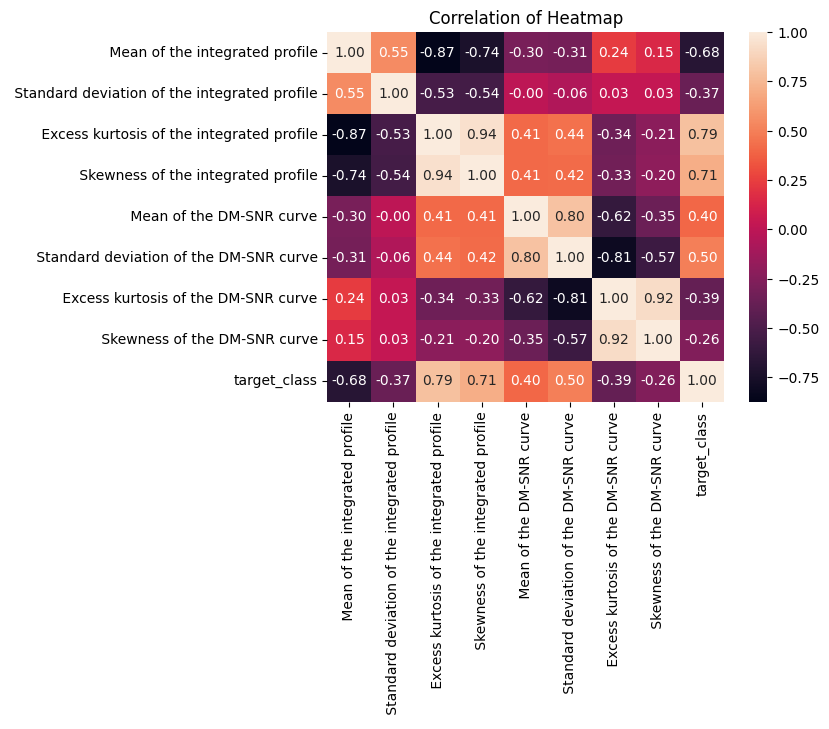

In [8]:
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation of Heatmap')
plt.show()

## Data Manipulation

We can visualize the data using a boxplot to see if the data contains any outliers

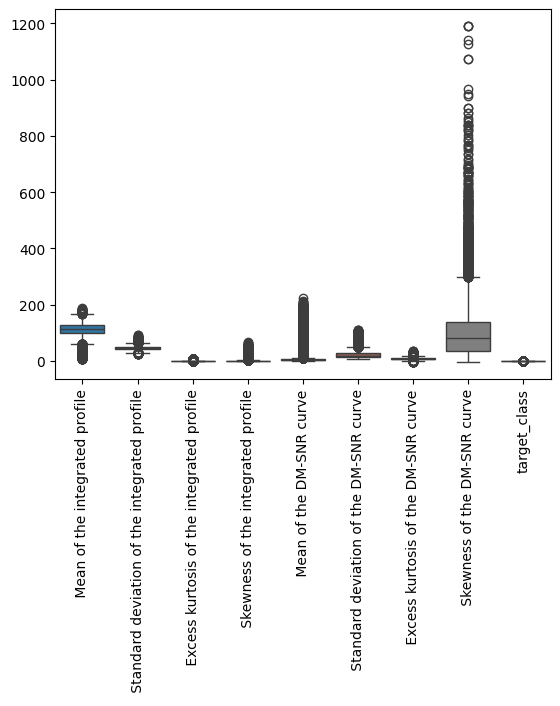

In [9]:
sns.boxplot(data=star_df)
plt.xticks(rotation=90)
plt.show()

We can use the winsorize technique to get rid of the outliers 

In [10]:
from scipy.stats.mstats import winsorize

In [11]:
for column in star_df.columns:
    if column != 'target_class':
        star_df[column] = winsorize(star_df[column], limits=[0.15,0.15])

#### boxplot after removing the outliers

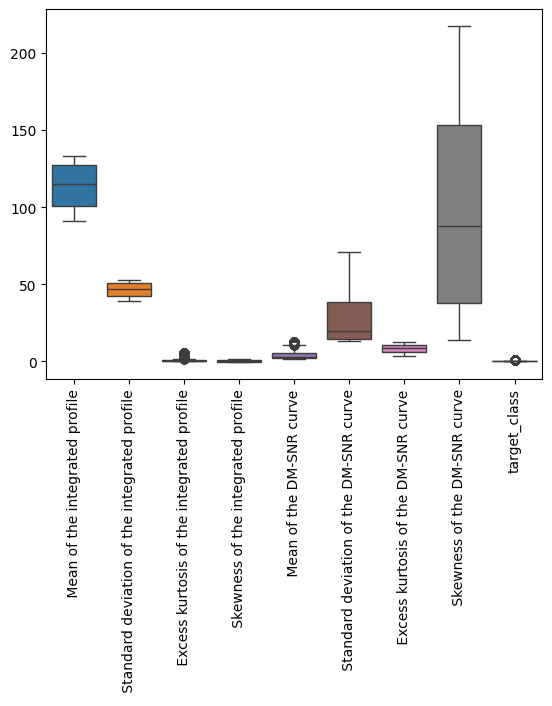

In [12]:
sns.boxplot(data=star_df)
plt.xticks(rotation=90)
plt.show()

The botplpot visuaization shows we havebeen able to mitigate the outliers in the dataset. 

## Modelling

In [13]:
#  define independent features X
X = star_df.drop('target_class', axis=1)

In [14]:
# define dependent feature y
y = star_df['target_class']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

#### scale the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC()

In [21]:
y_train.unique()

array([0., 1.])

In [22]:
svc.fit(X_train, y_train)

SVC()

In [23]:
y_predict = svc.predict(X_test)
y_predict

array([0., 1., 0., ..., 0., 0., 0.])

## Metrics 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, ConfusionMatrixDisplay, confusion_matrix

In [25]:
Accuracy = accuracy_score(y_test, y_predict)
Precision = precision_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'Accuracy': Accuracy,
'Precision': Precision,
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE,
})

{'Accuracy': 0.9784517158818835, 'Precision': 0.9210526315789473, 'MAE': 0.02154828411811652, 'MSE': 0.02154828411811652, 'RMSE': 0.14679333812580367}


#### confusion matrix

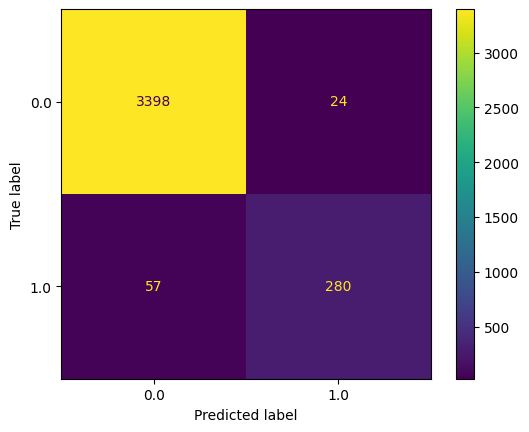

In [26]:
cm = confusion_matrix(y_test, y_predict,labels=svc.classes_)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
matrix.plot()

Only 24 values are classified as false positives while only 57 values are registered as false negatives. This represents a very small percentage of the data. The model is built using the default parameters. This parameters can be tuned to give a better model by employing hyperparameter tuning 